In [1]:
# 필요한 패키지 불러오기
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# Import to_categorical from tensorflow.keras.utils or keras.utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [2]:
# seed 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


원래 x 값:

[ [0, 0, 128, 255, ...],  
  [12, 34, 200, 255, ...],  
  ... ]

  0~255 처럼 큰 값을 그대로 넣으면 →
계산할 때 값이 커져서 학습 불안정해짐 (폭주)

 "컴퓨터가 보기 쉽게 밝기값(0~1)으로 바꾼 것"

In [3]:
# 정규화
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
print(x_train.shape)
print(type(x_train))

(60000, 28, 28, 1)
<class 'numpy.ndarray'>


In [5]:
# CNN 모델 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [7]:
# 폴더 생성 사용
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = MODEL_DIR + 'epoch{epoch:02d}-val_loss{val_loss:.4f}.h5'

In [8]:
# 콜백 설정하기
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(filepath=modelpath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [9]:
# 모델 학습시키기
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=20,
                    batch_size=100,
                    callbacks=[checkpoint, early_stopping])

Epoch 1/20
594/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8238 - loss: 0.5603
Epoch 1: val_loss improved from inf to 0.05433, saving model to ./model/epoch01-val_loss0.0543.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8249 - loss: 0.5570 - val_accuracy: 0.9812 - val_loss: 0.0543
Epoch 2/20
592/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9691 - loss: 0.1035
Epoch 2: val_loss improved from 0.05433 to 0.03767, saving model to ./model/epoch02-val_loss0.0377.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9691 - loss: 0.1033 - val_accuracy: 0.9875 - val_loss: 0.0377
Epoch 3/20
596/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9783 - loss: 0.0713
Epoch 3: val_loss improved from 0.03767 to 0.03290, saving model to ./model/epoch03-val_loss0.0329.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9783 - loss: 0.0713 - val_accuracy: 0.9887 - val_loss: 0.0329
Epoch 4/20
589/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9825 - loss: 0.0580
Epoch 4: val_loss improved from 0.03290 to 0.02912, saving model to ./model/epoch04-val_loss0.0291.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9825 - loss: 0.0580 - val_accuracy: 0.9905 - val_loss: 0.0291
Epoch 5/20
595/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9846 - loss: 0.0482
Epoch 5: val_loss improved from 0.02912 to 0.02765, saving model to ./model/epoch05-val_loss0.0277.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9847 - loss: 0.0482 - val_accuracy: 0.9900 - val_loss: 0.0277
Epoch 6/20
590/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9876 - loss: 0.0409
Epoch 6: val_loss did not improve from 0.02765
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9876 - loss: 0.0409 - val_accuracy: 0.9899 - val_loss: 0.0277
Epoch 7/20
594/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9881 - loss: 0.0370
Epoch 7: val_loss improved from 0.02765 to 0.02429, saving model to ./model/epoch07-val_loss0.0243.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9881 - loss: 0.0370 - val_accuracy: 0.9918 - val_loss: 0.0243
Epoch 8/20
586/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9899 - loss: 0.0319
Epoch 8: val_loss did not improve from 0.02429
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9899 - loss: 0.0319 - val_accuracy: 0.9907 - val_loss: 0.0280
Epoch 9/20
592/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9907 - loss: 0.0293
Epoch 9: val_loss did not improve from 0.02429
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9907 - loss: 0.0293 - val_accuracy: 0.9912 - val_loss: 0.0257
Epoch 10/20
589/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0263
Epoch 10: val_loss did not improve from 0.02429
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9917 - loss: 0.0263 - val_accuracy: 0.9927 - val_loss: 0.0244
Epoch 11/20
588/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9918 - loss: 0.0227
Epoch 11: val_loss improved from 0.02429 to 

600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9918 - loss: 0.0227 - val_accuracy: 0.9935 - val_loss: 0.0221
Epoch 12/20
588/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9923 - loss: 0.0210
Epoch 12: val_loss improved from 0.02213 to 0.02205, saving model to ./model/epoch12-val_loss0.0221.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9924 - loss: 0.0210 - val_accuracy: 0.9936 - val_loss: 0.0221
Epoch 13/20
590/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9934 - loss: 0.0189
Epoch 13: val_loss did not improve from 0.02205
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9934 - loss: 0.0189 - val_accuracy: 0.9923 - val_loss: 0.0272
Epoch 14/20
591/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9942 - loss: 0.0169
Epoch 14: val_loss did not improve from 0.02205
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9942 - loss: 0.0169 - val_accuracy: 0.9913 - val_loss: 0.0283
Epoch 15/20
586/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9942 - loss: 0.0180
Epoch 15: val_loss did not improve from 0.02205
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accuracy: 0.9938 - val_loss: 0.0238
Epoch 16/20
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9948 - loss: 0.0165
Epoch 16: val_loss did not improve from 

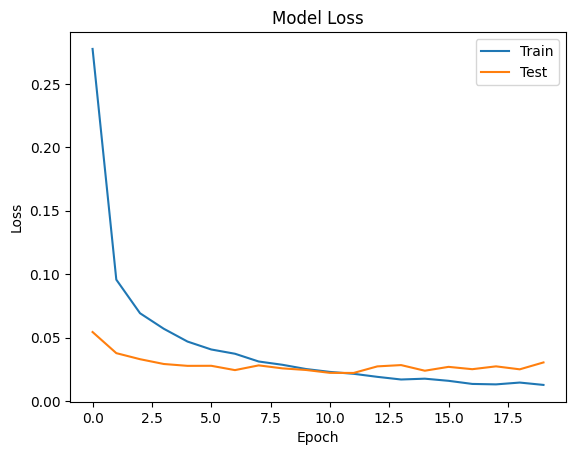

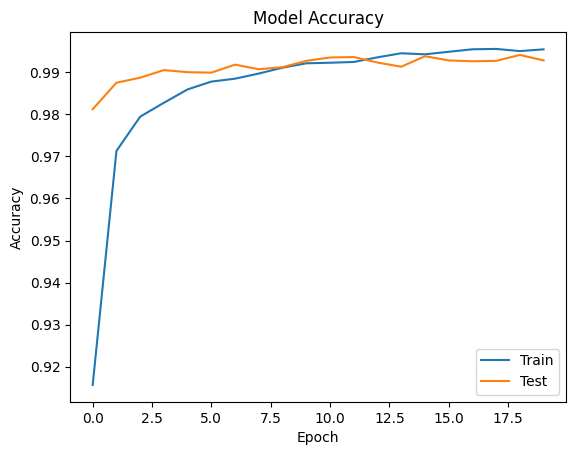

In [10]:
# 학습 과정 시각화 (손실 함수 그래프)

# print(history.history.keys())  # 어떤 값들이 들어있는지 확인용

# Loss 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Accuracy 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
